# Producing Data: Sampling

Consider the population of all students at a large university taking introductory statistics courses (1,129 students taking statistics for business, social sciences, or natural sciences).

Suppose we are interested in the values of four specific variables for this population: handedness (right-handed or left-handed), sex, SAT Verbal score, and age. If we were unable to determine the values of those variables for the entire population, we may be able to take a random sample from that population, and use the sample summaries as estimates for population summaries. Would the random sample provide unbiased estimates for the population values?

Next, what if instead of taking a random sample, we sampled the 192 students who happen to be enrolled in the business statistics course? First we will intuit, then check, if they would be a representative sample with respect to each of the four variables: handedness, sex, SAT Verbal score, and age. It may be helpful for you to know that, at this university, all students have comparable options in terms of when they take introductory statistics. You should also know that women, on the whole, tend to do somewhat better than men on the verbal portion of the SAT, and that business is a major that tends to interest males more than females.

To summarize the goals for this activity, we will:

A. Verify that the distributions of the variables handedness, sex, SAT Verbal score, and age are roughly the same for the random sample as they are for the population.

B. Intuit whether the distributions of each of the four variables in the (nonrandom) sample of business students would be roughly the same as those for the population, or whether there is a reason to expect any of them to be biased.

C. Check our intuition by comparing the distributions of each of the four variables for the sample of business students with those for the population, and determine whether they are roughly the same or if the sample values for any of the variables appear to be biased.

Our dataset contains data on the entire population of 1,129 students, which includes students taking introductory statistics who are majoring in the natural and social sciences, as well as for business majors.

### Understand Data

In [1]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(True)
seed = 8

In [2]:
population = pd.read_excel('files/student_survey.xls')
population = population.replace({'*': None})
population.head()

,Course,Handed,Sex,Verbal,Age
0,Social,left,male,470.0,18.83
1,Social,right,female,650.0,18.67
2,Social,right,male,580.0,20.08
3,Social,right,female,660.0,18.50
4,Social,right,female,790.0,24.25


The variables are defined as follows:

- Course: natural science, social science, or business
- Handed:righthanded or lefthanded
- Sex: female or male
- Verbal: SAT Verbal scores up to 800
- Age: in years

First, we will take a simple random sample of the data. For the sake of consistency, we will make the random sample the same size (192) as the nonrandom sample of business statistics students that will be examined later.

In [3]:
random_sample = population.sample(n=192, random_state=seed)

In [4]:
random_sample.head()

,Course,Handed,Sex,Verbal,Age
1094,Business,right,female,410.0,18.75
1038,Business,right,female,660.0,20.92
794,Social,right,female,550.0,21.25
1036,Business,right,male,NaN,18.75
147,Natural,right,male,720.0,18.92


### PART A. 
Now we will determine whether the four variables' behavior for the random sample is comparable to their behavior for the population.

#### Handedness

In [5]:
random_sample_percent = 100 * random_sample.groupby('Handed').Handed.count() / len(random_sample)

In [6]:
pop_percent_handedness = 100 * population.groupby('Handed').Handed.count() / len(population)

In [7]:
s_data = go.Bar(x=random_sample_percent.index, y=random_sample_percent, name="Random Sample")
p_data = go.Bar(x=pop_percent_handedness.index, y=pop_percent_handedness, name="Population")

In [8]:
layout = go.Layout(
    title="Handedness",
    barmode="group"
)

In [9]:
iplot(go.Figure(data=[p_data, s_data], layout=layout))

In [10]:
s_data = go.Pie(labels=random_sample_percent.index, values=random_sample_percent, name="Random Sample", 
                domain={'x':[0, 0.5], 'y': [1, 0]})
p_data = go.Pie(labels=pop_percent_handedness.index, values=pop_percent_handedness, name="Population",
               domain={'x':[0.51, 1], 'y': [1, 0]})

In [11]:
layout = go.Layout(
    title="Handedness", 
)

In [12]:
iplot(go.Figure(data=[p_data, s_data], layout=layout))

#### Gender

In [13]:
random_sample_percent = 100 * random_sample.groupby('Sex').Sex.count() / len(random_sample)
pop_percent_gender = 100 * population.groupby('Sex').Sex.count() / len(population)

In [14]:
s_data = go.Pie(labels=random_sample_percent.index, values=random_sample_percent, name="Random Sample",
                domain={'x':[0, 0.5], 'y': [1, 0]})
p_data = go.Pie(labels=pop_percent_gender.index, values=pop_percent_gender, name="Population", 
                domain={'x':[0.51, 1], 'y': [1, 0]})

In [15]:
iplot(go.Figure(data=[p_data, s_data], layout={'title': 'Sex'}))

#### Verbal

Create 2 descriptive statistics summary tables—one for SAT Verbal score in the population and one for SAT Verbal score in the sample

##### Random Sample

In [18]:
print(random_sample.Verbal.describe())
random_sample.Verbal.hist()

count    169.000000
mean     583.786982
std       73.431063
min      300.000000
25%      540.000000
50%      580.000000
75%      630.000000
max      760.000000
Name: Verbal, dtype: float64


##### Population

count    998.000000
mean     588.780561
std       76.081470
min      300.000000
25%      540.000000
50%      590.000000
75%      640.000000
max      800.000000
Name: Verbal, dtype: float64


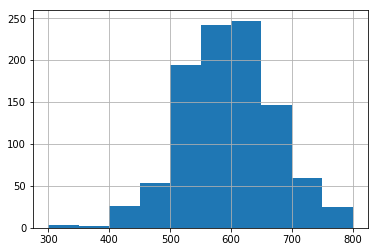

In [19]:
print(population.Verbal.describe())
population.Verbal.hist()

#### Age

##### Random Sample

count    191.000000
mean      20.290576
std        3.210816
min       18.000000
25%       19.170000
50%       19.670000
75%       20.500000
max       50.830000
Name: Age, dtype: float64


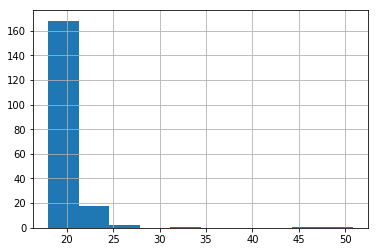

In [20]:
print(random_sample.Age.describe())
random_sample.Age.hist()

##### Population

count    1123.000000
mean       20.374898
std         3.188835
min        17.670000
25%        19.080000
50%        19.670000
75%        20.670000
max        74.170000
Name: Age, dtype: float64


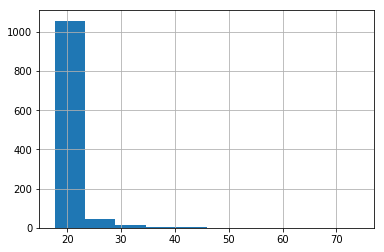

In [21]:
print(population.Age.describe())
population.Age.hist()

### Part B
For each of the variables—Handed, Sex, Verbal, and Age—decide whether or not you believe the sample of business statistics students should be fairly representative of the larger population of all students in introductory statistics courses.

• **Handed**—should be representative. Business students shouldn't be any different from other students with respect to this variable.

• **Sex**—could easily be biased. We expect fewer women in business than in the social or natural sciences.

• **Verbal**—could easily be biased. Business students' SAT Verbal scores may tend to be lower, since there are likely to be fewer women, and women tend to do better on the verbal portion of the SAT (as the background to this problem suggests).

• **Age**—should be representative. Regardless of major, students may take introductory statistics at about the same point in their college career (as suggested by the background).

### PART C
How representative is the (nonrandom) sample of students in the business statistics course, in actuality? In order to answer this question, we will need to extract this group from the population.

In [22]:
business_students = population[population.Course == 'Business']
business_students.head()

,Course,Handed,Sex,Verbal,Age
118,Business,right,male,500.0,18.08
119,Business,right,female,640.0,19.92
120,Business,right,male,530.0,19.58
121,Business,left,male,480.0,18.50
139,Business,right,male,520.0,19.42


Next, we explore whether the four variables' behavior for the (nonrandom) sample of business statistics students is comparable to their behavior for the population

#### Handedness

In [31]:
business_percent = 100 * business_students.groupby('Handed').Handed.count() / len(business_students)

In [32]:
s_data = go.Pie(labels=business_percent.index, values=business_percent, name="Random Sample", 
                domain={'x':[0, 0.5], 'y': [1, 0]})
p_data = go.Pie(labels=pop_percent_handedness.index, values=pop_percent_handedness, name="Population",
               domain={'x':[0.51, 1], 'y': [1, 0]})

In [33]:
layout = go.Layout(
    title="Handedness"
)

In [34]:
iplot(go.Figure(data=[p_data, s_data], layout=layout))

#### Gender

In [35]:
business_percent = 100 * business_students.groupby('Sex').Sex.count() / len(business_students)

In [36]:
s_data = go.Pie(labels=business_percent.index, values=business_percent, name="Random Sample", 
                domain={'x':[0, 0.5], 'y': [1, 0]})
p_data = go.Pie(labels=pop_percent_gender.index, values=pop_percent_gender, name="Population",
               domain={'x':[0.51, 1], 'y': [1, 0]})

In [38]:
layout = go.Layout(
    title="Handedness"
)
iplot(go.Figure(data=[p_data, s_data], layout=layout))

#### Verbal

count    171.000000
mean     574.649123
std       74.065907
min      340.000000
25%      530.000000
50%      580.000000
75%      620.000000
max      760.000000
Name: Verbal, dtype: float64


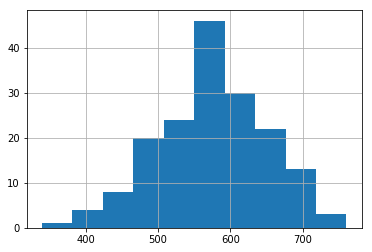

In [39]:
print(business_students.Verbal.describe())
business_students.Verbal.hist()

count    998.000000
mean     588.780561
std       76.081470
min      300.000000
25%      540.000000
50%      590.000000
75%      640.000000
max      800.000000
Name: Verbal, dtype: float64


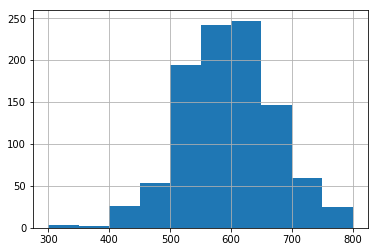

In [40]:
print(population.Verbal.describe())
population.Verbal.hist()

#### Age

count    192.000000
mean      20.306771
std        4.785640
min       17.670000
25%       18.830000
50%       19.500000
75%       20.250000
max       74.170000
Name: Age, dtype: float64


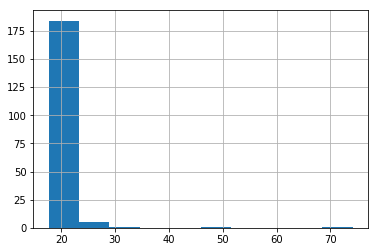

In [41]:
print(business_students.Age.describe())
business_students.Age.hist()

count    1123.000000
mean       20.374898
std         3.188835
min        17.670000
25%        19.080000
50%        19.670000
75%        20.670000
max        74.170000
Name: Age, dtype: float64


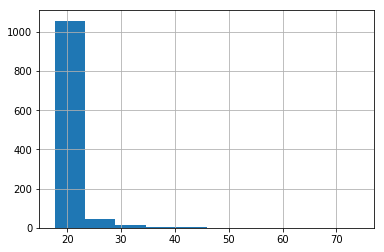

In [43]:
print(population.Age.describe())
population.Age.hist()